Importing the libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression



Importing the Dataset

In [3]:
data=pd.read_csv("D:/Machine learning/House Price Prediction using Machine Learning/data.csv")
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [4]:
# Check for missing values
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
# Stastistical measures of the dataset
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
data.drop(columns=['date', 'street', 'city', 'statezip','country'], inplace=True)

Understanding the correlation between various features in the dataset

1. Positive Correlation = if one of the variable increasing, the other one will increasing too<br>
2. Negative Correlation = if one of the variable increasing, the other one will decresasing

In [7]:
correlation = data.corr()

<Axes: >

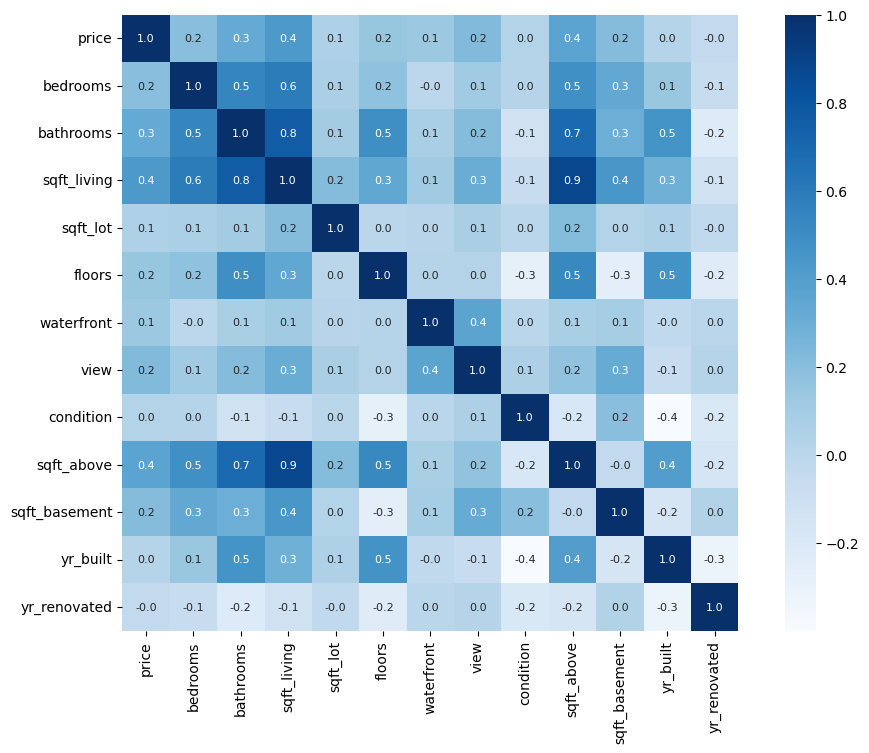

In [23]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(12,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and Target

In [9]:
X = data.drop(['price'], axis=1)
Y = data['price']

In [10]:
print(X)
print(Y)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          3.0       1.50         1340      7912     1.5           0     0   
1          5.0       2.50         3650      9050     2.0           0     4   
2          3.0       2.00         1930     11947     1.0           0     0   
3          3.0       2.25         2000      8030     1.0           0     0   
4          4.0       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595       3.0       1.75         1510      6360     1.0           0     0   
4596       3.0       2.50         1460      7573     2.0           0     0   
4597       3.0       2.50         3010      7014     2.0           0     0   
4598       4.0       2.00         2090      6630     1.0           0     0   
4599       3.0       2.50         1490      8102     2.0           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renova

Splitting the data into Training and Test data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(4600, 12) (3680, 12) (920, 12)


Model Training

XGBoost Regressor

In [ ]:
# Loading the model
model = XGBRegressor()

In [14]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [15]:
# accuracy for predictional on training data
training_data_prediction = model.predict(X_train)

In [16]:
print(training_data_prediction)

[368145.   268878.6  466507.62 ... 409889.34 349621.53 506033.3 ]


In [17]:
# R square error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

In [18]:
print("R Squared Error :", score_1)
print("Mean Squared Error :", score_2)

R Squared Error : 0.9611341114008355
Mean Squared Error : 60172.629767572034


Visualizing the actual Prices and predicted prices

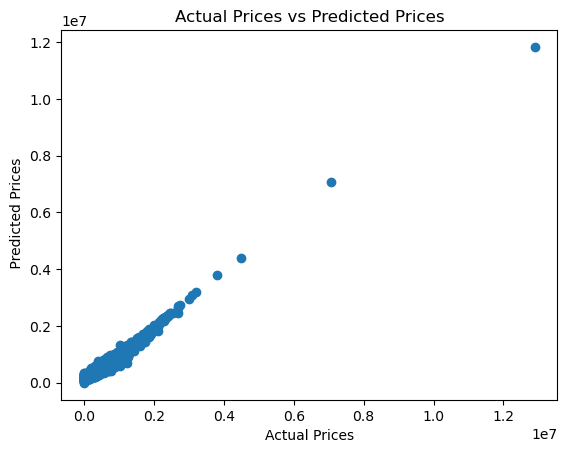

In [19]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel(" Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Prediction on Test data

In [20]:
# accuracy for predictional on test data
test_data_prediction = model.predict(X_test)

In [21]:
print(test_data_prediction)

[ 366564.03  406522.28  594233.9   383931.12  539053.94  386382.28
  433348.34  487424.62  531549.2   357149.5   232284.    368437.22
  353490.62  607447.9   361449.88  742956.4   521980.78  681492.75
  769703.6   493508.62  430755.28  469808.78  445767.03  352955.97
  521340.06  938701.44  442319.03  512944.88  320791.06  635729.44
  319485.44  764674.44  496092.1   456642.44  486879.38  506143.12
  458411.47  395934.66  651925.56  735758.4   444311.88  468560.12
  244970.31  774279.6   792525.1   946810.44  357429.88  362451.34
  830396.3   450185.53  359654.84  543817.    736091.2   687797.8
  322072.78  516949.5   420280.3   525788.75  605275.94  481951.56
  294159.97 2035747.6   568625.44  906660.4   309771.22  521906.9
  479728.47  732863.94  285382.6   479192.22  588625.2   741064.1
  473444.16  911801.9   990406.56  448026.84  565313.56  234714.62
  503025.8   602798.9   544345.9   374359.66  640078.4  3147203.
  310267.7   476265.25  669551.56  372025.38  371523.12  545556.5
 

In [22]:
# R square error
score_3 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R Squared Error :", score_3)
print("Mean Squared Error :", score_4)

R Squared Error : 0.024935407026491996
Mean Squared Error : 199981.27606724022


Hasil

MSE di training set menunjukkan error yang sangat besar

R Squared error di test set tidak optimal dan MSE di test set sangat besar 

Model belum optimal